### Изучение закономерностей, определяющих успешность игр

Описание проекта  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.  

Задачи проекта  
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

In [153]:
#изучаем данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')
print(data.head(10))

data.info()

data.describe()

print(data.duplicated().sum())

data.isna().agg(['sum', 'mean']).T

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

,sum,mean
Name,2.0,0.000120
Platform,0.0,0.000000
Year_of_Release,269.0,0.016093
Genre,2.0,0.000120
NA_sales,0.0,0.000000
EU_sales,0.0,0.000000
JP_sales,0.0,0.000000
Other_sales,0.0,0.000000
Critic_Score,8578.0,0.513192
User_Score,6701.0,0.400897


In [154]:
#подготовка данных
# привидем к нижнему регистру
data.columns = data.columns.str.lower()

In [155]:
# привидем данные к нужным типам

data['user_score'].unique()
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Год выпуска переводим в формат даты   
Что касается пользовательского рейтинга то в нем встречается аббривиатура "tbd"(to be determinated) - подлежит определению, заменим аббривиатуру на nan для того чтобы приветси значения к типу float64

In [156]:
# обрабатываем пропуска
data.isna().agg(['sum', 'mean']).T

#безымянные, без года выпуска и указания жанра удаляем, так как количество пропусков крайне не велико
data.dropna(subset = ['name'], inplace=True)
data.dropna(subset = ['genre'], inplace=True)
data.dropna(subset = ['year_of_release'], inplace=True)


Удаление 2 игр без названия и жанра не радикально изменит статистику, игры без года выпуска составляют 1,6% датасета, по видимому это игры независимых разработчиков(которые выпускались крайне долго и без поддержки издательства, соответсвенно не имели официального релиза) или ремейки игр с более архаичных платформ(например игровых автоматов) вышедшие крайне давно, так что их релиз установить невозможно

In [157]:
# обрабатываем пропуска
data['rating'] = data['rating'].fillna('no_rating')


Колонка с возрастынмрейтином относится к типу object по тому пропуски можно заполнить собственным типом no_rating.Возможно данные игры выходили во времена когда рейтинговая комиссия еще не функционировала полноценно. Более сложная ситуация с пользовательским рейтингом и отзывами критиков: данные данные нельзя восставновить или заполнить средним/медианным значением так как это будет фальсификацией данных. Оставим эти поля пустыми 

In [158]:
# считаем продажи и добавляем в датасет
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [159]:
# подытожим
print(data.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          E   
1      3.58      6.81         0.77           NaN         NaN  no_rating   
2     12.76      3.79         3.29          82.0         8.3          E   
3     10.93      3.28         2.95          80.0         8.0          E   
4      8.89     10.22         1.00           NaN         NaN  no_rating   

   total_sales  
0        82.54  
1        40.24  
2        35

Пропуски в данных восстановить не представляется возможным(медианные или средние значения для названия, годы выпуска или рейтингов лишь исказят даныне) за исключением возрастного рейтинга. Его отсутствие можно объяснить тем что рейтинговая комиссия не смогла присвоить возрастной рейтинг, либо не получала игру на рецензию, по этому чтобы пропуски не смущали заполняем их no_rating.  
        Пропуски в жанре, названии и годе выпуска втроем сумарно составляют менее 2%, их удаление не повлетчет за собой существенных изменений.  
        Остальнын пропуски оставим без изменений, в случае необходимости дальнейшего анализа (к примеру пользовательского рейтинга) просто удалим пустые строки. Пока пустые строки оставим чтобы использовать информацию из не пустых граф.

2007.0

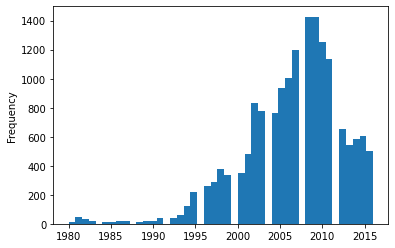

In [160]:
# Начинаем исследовательский анализ.
#Проанализируем годы выпуска
data['year_of_release'].plot(kind='hist', bins=45)
data['year_of_release'].median()

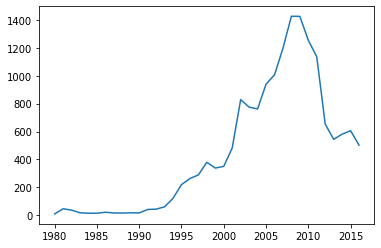

In [161]:
# построим линейный график
x = data.groupby('year_of_release')['name'].count() 
plt.plot(x)
plt.show()

с начала 80х до середины начала 90х игр выпускалось достаточно немного, скорее всего в силу технического развития. А вот появление новых видеоадаптеров и window95 дало заметный толчок индустрии. По графику мы можем заметить скачкообразный активный рост до конца 2010х. Затем ААА игры стали слишком дороги в производстве и количество из релизов снизилось. К тому же рынок ПК, консолей стал теснить мир смартфонов, так что производители стали тчательнее считать деньги на производство, понимаю что прежние прибыли не получить даже при условии роста рынка. К слову это так же убило рынок портаьтвных консолей, который был в коме до пришествия nintendo switch.

In [162]:
#Проанализируем продажи
data['platform']= data['platform'].str.lower()

top_sales_platform = data.groupby('platform')['total_sales'].agg(['count', 'sum'])
top_sales_platform.sort_values('sum', ascending=False).head(10)

,count,sum
platform,,
ps2,2127,1233.56
x360,1232,961.24
ps3,1306,931.34
wii,1286,891.18
ds,2121,802.78
ps,1190,727.58
ps4,392,314.14
gba,811,312.88
psp,1193,289.53


на всякий случай переделываем названия платформ в нижний регистр. Самой прибыльной платформой является ps2.

pc      22.222222
x360    10.256410
ps2     10.256410
psp     10.256410
wii      9.401709
ds       9.401709
ps3      9.401709
ps       8.547009
gba      6.837607
ps4      3.418803
Name: platform, dtype: float64


<AxesSubplot:xlabel='year_of_release'>

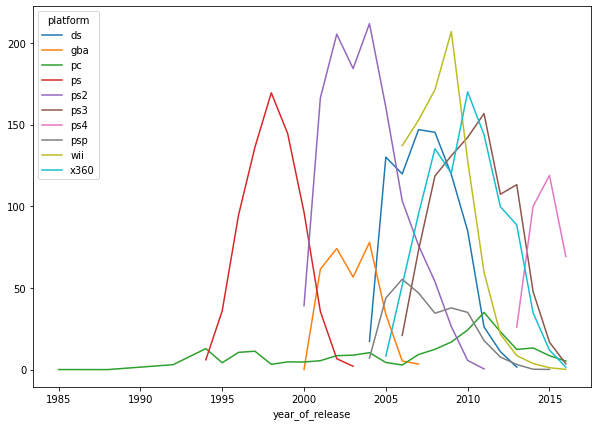

In [163]:
#Проанализируем продолжительность жизни платформ
top_10_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc']
top_10_sales_platform = data.query('platform in @top_10_list')
life_years = top_10_sales_platform.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
print(life_years['platform'].value_counts('sum')*100)
pd.pivot_table(life_years , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7))

Платформы(за исключением пк) пользуются спросом обычно от 9 до 11 лет, при этом пиковые продажи затрагивают только 4-5 лет. Поэтому для прогнозов на 2017 год возьмем данные с 2012 года.

<AxesSubplot:xlabel='year_of_release'>

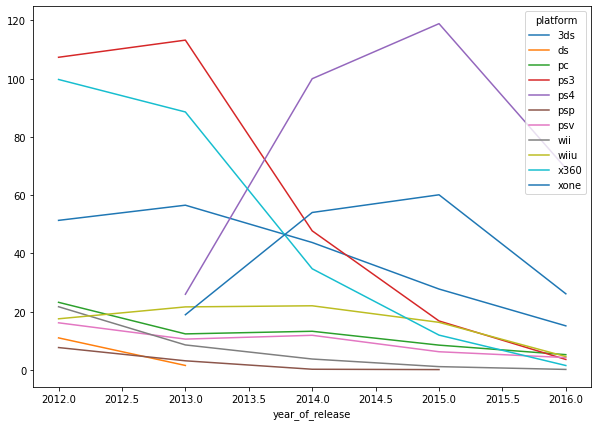

In [164]:
# рассмотрим по подробнее продажи в топ 10 платформах в период с 2012 года
top_10_sales_platform = data.query('year_of_release >= 2012.0')
life_years = top_10_sales_platform.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})
pd.pivot_table(life_years , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7))

У всех платформ граффик нисходящий, как было отмечено ранее объем выпускаемых игр в 2010х снизился, поэтому рассмотрим наименее нисходящие тренды. Стабильность показывает платформа ПК, хоть и общий оъем не высок. Так же из графика видно что потенциал есть у двух свежих(на тот момент) платформ: PS4 и XBOX One

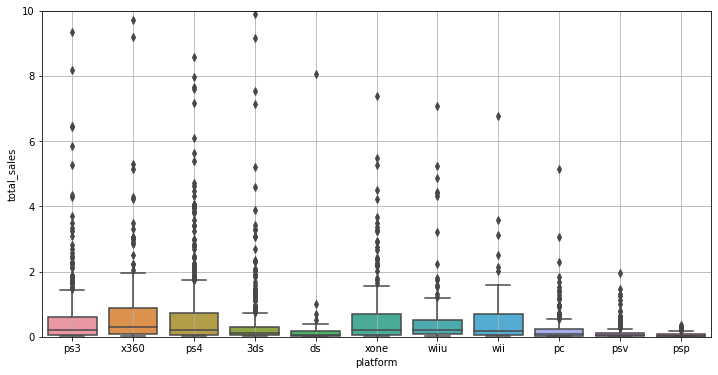

In [165]:
#построим ящик с усами, для достоверности на топ 10 платформ
plt.figure(figsize=(12,6))
seaborn.boxplot(y=top_10_sales_platform['total_sales'], x=top_10_sales_platform['platform'])
plt.ylim(0,10)
plt.grid()

Ассиметричный ящик и большое колличество выбросов говорит о том что игры приносят прибыл крайне не равномерно.Из личного опыта - каждый кто играет на консоли значет что playstation и xbox привлекательны во многом своими эксклюзивами. Эта теория с легкостью графиком доказыветься: огромные выбросы у sony пс4 и пс3, не сильно им уступающий microsoft с xbox one. В тоже время пк финансово прибыльными эксклюзивами похвастаться не может, что и водно на графике.

0.406567902061781
-0.031957110204556376


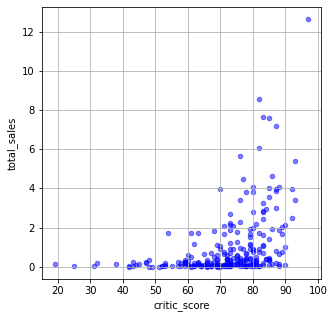

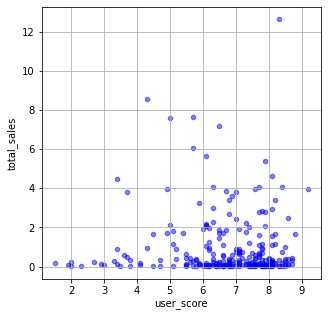

In [166]:
#посмотрим зависимость продаж от озывов, начнем с ps4
ps4_list= ['ps4']
ps4 =  data.query('platform in @ps4_list')
ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
print(ps4['total_sales'].corr(ps4['critic_score']))
print(ps4['total_sales'].corr(ps4['user_score']))

Судя по графику хорошо могут продаваться игры и с не очень высокими оценками пользователей, что касается отзвывов критиков то они более сопоставимы с продажами, но уровень корреляции все еще не высок.

0.41699832800840175
-0.06892505328279412


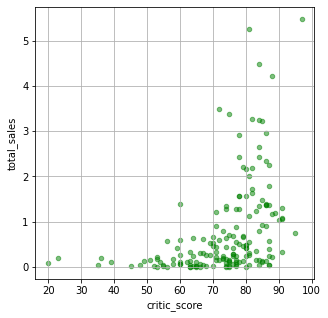

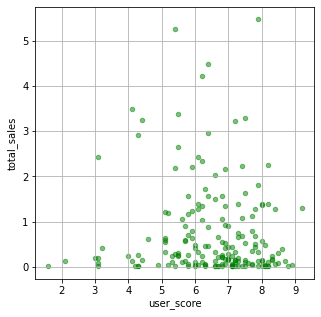

In [167]:
# посмотрим чем ответит конкурентам microsoft
xboxone_list= ['xone']
xboxone=  data.query('platform in @xboxone_list')
xboxone.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='g', alpha=0.5, grid=True)
xboxone.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='g', alpha=0.5, grid=True)
print(xboxone['total_sales'].corr(xboxone['critic_score']))
print(xboxone['total_sales'].corr(xboxone['user_score']))

Результат крайне похож на прямого конкурента

0.25739471840098505
0.012904741611451175


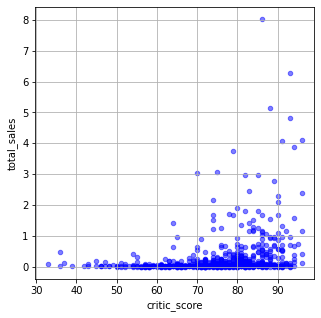

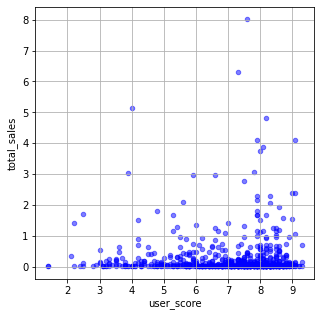

In [168]:
#посмотрим как дела у пк
pc_list= ['pc']
pc =  data.query('platform in @pc_list')
pc.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
pc.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
print(pc['total_sales'].corr(pc['critic_score']))
print(pc['total_sales'].corr(pc['user_score']))

У пк уровень корреляции с отзывами критиков еще ниже, хотя отзывы пользователей вышли из отрицательной зоны по прежнему можно утверждать что пользовательские оценци и отзывы критиков не оказывают решающего влияния на продажи

0.2453488454741138
0.08798399271321648


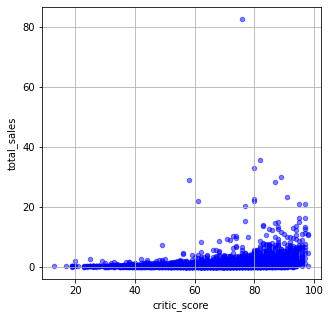

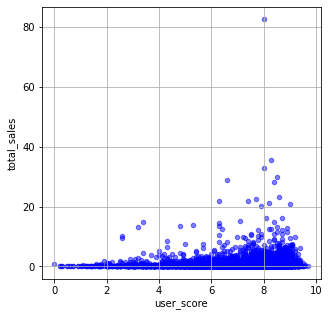

In [169]:
#посмотрим как дела у платформ в целом
data.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
data.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='b', alpha=0.5, grid=True)
print(data['total_sales'].corr(data['critic_score']))
print(data['total_sales'].corr(data['user_score']))

В целом на рынке ситуация очень схожа с продажами на пк. В этом плане ps4 и xbox one отличаются от рынка в целом - их корреляция почти вдвое больше. Можно сделать общий вывод о том что на наиболеее востребованые в данный момент платформы отзывы критиков оказывают незначительное влияние на продажи игр, тогда как в общем по рынку эта зависимость совсем не велика.

total_sales     734.530833
name           1370.333333
dtype: float64


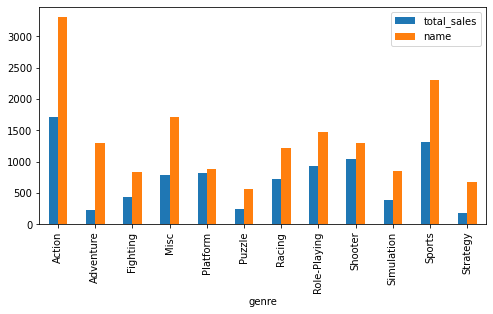

In [180]:
#проанализируем продажи по жанрам
genre_sales=data.query('year_of_release >= 2012.0')
genre_sales = data.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})
genre_sales.plot(kind='bar', figsize=(8, 4))

Топ 3 самых прибыльных жанра это: action, shooter и sports. При колличество выпускаемых в них игр многочисленно, а значит на каждую отденую игру приходиться меньше выручки. Поэтому наиболее интересным из данных 3 жанров является shooter, хотя action продается в целом значительно лучше. Что касается самых малопродаваемых жанров то это strategy, puzzle и adventure. В последнем еще и крайне велико количество игр, а значит он будет для разработки самым финансово не привлекательным

genre
Action          0.519057
Adventure       0.180456
Fighting        0.528865
Misc            0.459204
Platform        0.940262
Puzzle          0.421599
Racing          0.590122
Role-Playing    0.628683
Shooter         0.803519
Simulation      0.452695
Sports          0.567940
Strategy        0.256419
Name: total_sales, dtype: float64


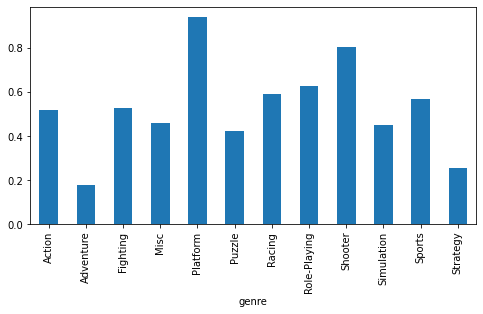

In [172]:
#проанализируем продажи по жанрам среднее
genre_sales=data.query('year_of_release >= 2012.0')
genre_sales_mean = data.groupby('genre')['total_sales'].mean()
genre_sales_mean.plot(kind='bar', figsize=(8, 4))
print(genre_sales_mean)

genre
Action          0.19
Adventure       0.05
Fighting        0.21
Misc            0.16
Platform        0.27
Puzzle          0.10
Racing          0.19
Role-Playing    0.18
Shooter         0.24
Simulation      0.15
Sports          0.22
Strategy        0.10
Name: total_sales, dtype: float64


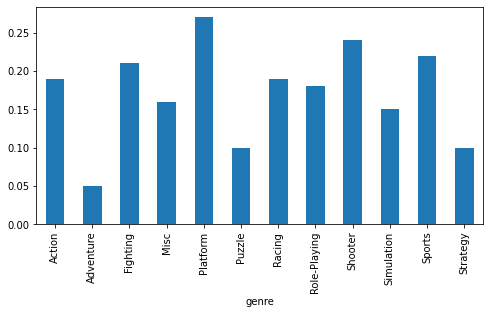

In [173]:
#проанализируем продажи по жанрам
genre_sales=data.query('year_of_release >= 2012.0')
genre_sales_median = data.groupby('genre')['total_sales'].median()
genre_sales_median.plot(kind='bar', figsize=(8, 4))
print(genre_sales_median)

По среднем и медианным продажам к уже названным action, shooter и sports (которые по суммарным показателям значительно выше, а по среднем не очень) можно добавить к итоговой рекомендации жанр platformer: его доля в сумарных продажах достаточно велика и каждая отдельная игра приносить хорошую прибыль. Так же можно отметить неплохие показатели у жанров racing и fighting, но их суммарные проажи находятся на достаточном низком уровне.

<AxesSubplot:xlabel='genre'>

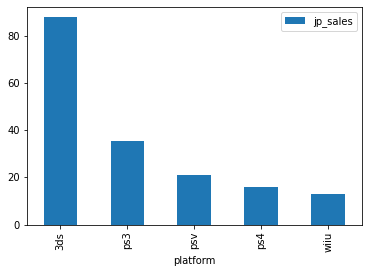

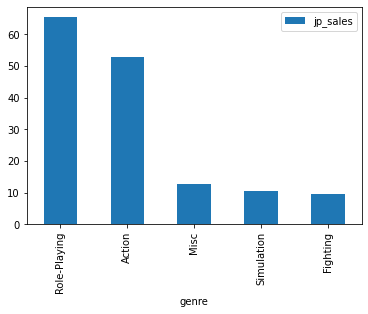

In [174]:
#составим портрет пользователя по регионам, начнем с востока
after_2012_sales= data.query('year_of_release >= 2012.0')
after_2012_sales.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind= 'bar')
after_2012_sales.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

В отличии от общемировой тенденции в Японии с отрывом господствует nintendo 3ds, заней несколько платформ от sony и снова nintendo wii. Microsoft в топ 5 вообще не попал. Так же отличается от глобальных продаж и жанры: Самым популярным с значительным отрывом является role-playing, затем action, остальыне значительно отстают

<AxesSubplot:xlabel='genre'>

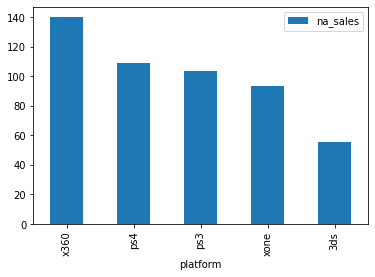

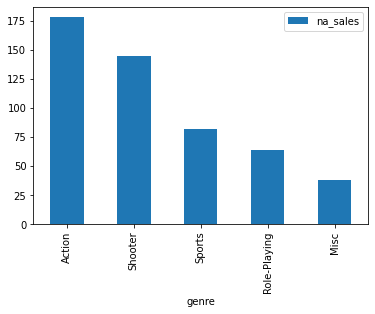

In [175]:
#отправляемся в Северную Америку
after_2012_sales.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind= 'bar')
after_2012_sales.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

Первество за microsoft, но не свежим(на тот момент) xbox one, а 360. За ним идет sony последнего поколения. nintendo занимает в отличии от Японии только 5 место. Жанры схожи с глобальынми продажами топ 3: acnion,shooter и sports.

<AxesSubplot:xlabel='genre'>

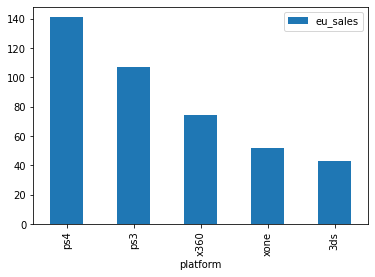

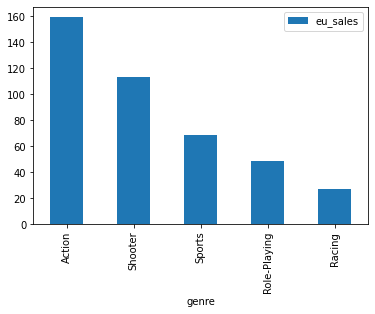

In [176]:
#обозрим Европу
after_2012_sales.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind= 'bar')
after_2012_sales.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')

Распределение жанров очень схоже с американским, исключение что в топ 5 на последнюю позицию попали гонки. В платформах пальму перветсва держут sony, затем xbox и только на 5 месте nintendo.

<AxesSubplot:xlabel='rating'>

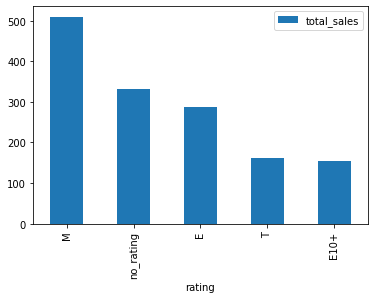

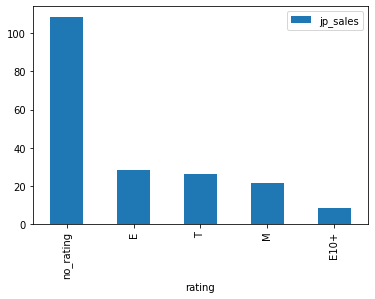

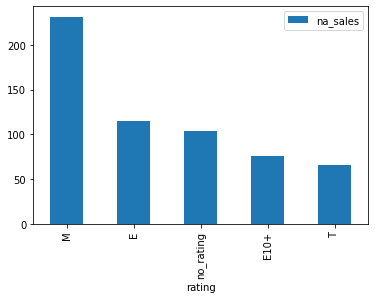

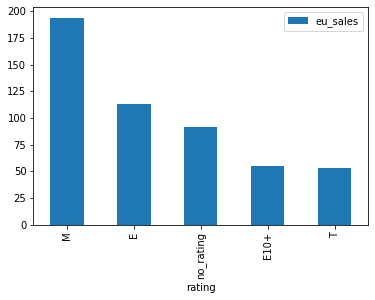

In [177]:
#проанализируем возрастной рейтинг
after_2012_sales.groupby(by='rating').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5).plot(kind='bar')
after_2012_sales.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
after_2012_sales.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
after_2012_sales.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')

для начала поясним категории рейтинга:
Е - для всех возрастов от 6 лет
Е10+ - от 10 и старше
Т - для подростков от 13 лет
М - 17+
no_rating - как вы надеюсь помните этот статус присвоили играм без рейтинга , заместо пропусков
Американский спрос и Европейский почти полностью совпадают, также они весьма сильно корелируют с общемировыми продажами: на первом месте игры для взрослой аудитории, на втором игры для всех возрастов. Японский рынок радикально отличается, в нем игры взрослой аудитории занимают лишь четвертое место, игры для всех возрастов хоть и на втором, но продаются значительно меньше. Лидируют на японском рынке с отрывом игры, которым критики не смогли присвоить возрастной рейтинг.

Проверяем гипотезы.
Нулевая гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Алтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [178]:
#отфильтруем данные для гипотезы
fitlred_rating= data
xboxone = fitlred_rating.query('platform == "xone"')['user_score'].dropna()
pc = fitlred_rating.query('platform == "pc" ')['user_score'].dropna()

#посмотрим среднее значение
xboxone_mean = xboxone.mean()
pc_mean = pc.mean()
print(xboxone_mean)
print(pc_mean)

#проведем тест
test = st.ttest_ind(xboxone, pc)
alpha = 0.05
if test.pvalue < alpha:
    print(f'p-value = {test.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {test.pvalue}.Не получилось отвергнуть нулевую гипотезу')

6.521428571428572
7.065960264900661
p-value = 1.3037979620149106e-05. Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, результаты теста показывают что различия в отзываъ являются статистически значимыми.
Подтверждаем алтернативную гипотезу так как средний пользовательский рейтинг xbox one 6,5, а pc 7.0

Проверяем вторую гипотезу.
Нулевая гипотеза:Средние пользовательские рейтинги жанров action и sports разные
Алтернативная гипотеза: Средние пользовательские рейтинги  жанров action и sports одинаковые

In [179]:
#отфильтруем данные для гипотезы
fitlred_rating_2= data
action = fitlred_rating_2.query('genre == "Action"')['user_score'].dropna()
sports = fitlred_rating_2.query('genre == "Sports" ')['user_score'].dropna()

#посмотрим среднее значение
action_mean = action.mean()
sports_mean = sports.mean()
print(action_mean)
print(sports_mean)

#проведем тест
test_2 = st.ttest_ind(action, sports)
alpha = 0.05
if test_2.pvalue < alpha:
    print(f'p-value = {test.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {test.pvalue}.Не получилось отвергнуть нулевую гипотезу')

7.058129175946549
6.951433857539316
p-value = 1.3037979620149106e-05.Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, результаты теста показывают что различия в отзывах не являются статистически значимыми. Что подстверждается средними значениями 7,05 у action и 6.95 у sports.

Вывод

В ходе исследования были выявлены актуальный период для исследованяи данных о продажах(4-5 лет) и срок жизни платформы(около 11). Наиболее перспективные платформы: ps4 и xbox one. Наиболее прибылные жанры action, shooter и sports. Было установлено что отзывы пользователей и критиков не оказывают значительного влияния на продажи. Была отвергнута гипотеза о равенстве пользовательских отзывов xbox one и pc, подсътверждена гипотеза о равенстве пользовательских рейтингов в жанрах action и sports.Выявлены региональные особенности: в Японии господствует 3ds, уделяется повышенное внимание жанку role-plaing  и безрейтинговым играм. В Северной Америке и Европе господстуют action и shooter, при возрастном рейтинге 17+. Но в Европе более популярны playstation, в Северной Америке xbox.

Рекомендации:
При планировании в глобальной оценке наиболее востребованными к продаже  будут продукты имеющие рейтинг взрослый либо для все семьи, котрые базируются на платформах ps4 или xbob one, относящиеся к жанрам action, shooter и sports. Так же стабильные показатели при продажах показывает жарн platformer.

